### Case Study - Assessment

#### Shoes price prediction

Objective:
Predicting shoes price for the customers of Zshoes and deploy with the help of flask.

#### Problem Statement:
Zshoes.com is one of the famous shoe manufacturers of India and has business in
almost every country in Asia and Europe. They are one of the best choices of all the
athletics and they make the best shoes for running. Due to pandemic, they are facing a
loss as Zshoes are a bit expensive. They want to know the correct price of all types of
shoes that they are manufacturing so that they won’t face any loss and at the same
time customers also buy the shoes. As a machine learning engineer, we have to build a
shoe-price prediction app that can predict the correct shoe price by taking inputs like
freight_value,payment_type, etc.

#### Feature Details:
- order_item_id: Order id of the shoe.
- price:price of the shoe(Target)
- freight_value: freight_value of the shoe
- payment_sequential: Sequence of payment
- payment_type:types of payment
- payment_installments: Installments of payments
- payment_value:Value of payment

####  Import the libraries.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import warnings and ignore
import warnings
warnings.filterwarnings("ignore")

####  Read the dataset(product_data.csv)

In [3]:
df = pd.read_csv("product_data.csv")
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [4]:
df.shape

(101335, 7)

In [5]:
# dropping order_item_id as it is of no use for the model building
df = df.drop("order_item_id", axis=1)
df.head()

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,58.90,13.29,1,1,2,72.19
1,239.90,19.93,1,1,3,259.83
2,199.00,17.87,1,1,5,216.87
3,12.99,12.79,1,1,2,25.78
4,199.90,18.14,1,1,3,218.04


In [6]:
# check for missing values
df.isnull().sum()

price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

- There are no null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 101335 non-null  float64
 1   freight_value         101335 non-null  float64
 2   payment_sequential    101335 non-null  int64  
 3   payment_type          101335 non-null  int64  
 4   payment_installments  101335 non-null  int64  
 5   payment_value         101335 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


- Every columns is of int or float type

In [8]:
# Check for duplicate values
duplicate = df[df.duplicated()]
duplicate

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
13,49.90,13.37,1,2,1,126.54
28,21.33,15.10,1,1,1,109.29
29,21.33,15.10,1,1,1,109.29
38,24.89,17.63,1,2,1,127.56
39,24.89,17.63,1,2,1,127.56
...,...,...,...,...,...,...
101329,55.00,34.19,1,2,1,356.76
101330,55.00,34.19,1,2,1,356.76
101331,119.85,20.03,1,1,3,139.88
101332,99.90,16.95,1,1,3,116.85


- The dataset has very high amount of duplicated data.

In [9]:
#Dropping duplicates
df = df.drop_duplicates()

In [10]:
df.head()

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,58.90,13.29,1,1,2,72.19
1,239.90,19.93,1,1,3,259.83
2,199.00,17.87,1,1,5,216.87
3,12.99,12.79,1,1,2,25.78
4,199.90,18.14,1,1,3,218.04


In [11]:
df.shape

(66164, 6)

- After removing all the duplicates we now have 66164 rows.

In [12]:
df.describe()

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
count,66164.000000,66164.000000,66164.000000,66164.000000,66164.000000,66164.000000
mean,87.839786,16.700311,1.124010,1.387068,2.821776,120.399225
std,59.174856,6.189687,0.792971,0.711408,2.597512,98.960892
min,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,39.990000,12.790000,1.000000,1.000000,1.000000,57.500000
50%,72.990000,16.080000,1.000000,1.000000,2.000000,100.000000
75%,120.000000,19.530000,1.000000,2.000000,4.000000,159.310000
max,270.000000,36.000000,26.000000,4.000000,24.000000,3195.730000


- From above describe function, we can infer that the minimum value for freight value, payment installments and payment value is zero. 
- Will look upon each column individually to understand the data.

- Minimum payment value is shown as 0.
- Since the payment cannot be zero, we need to update it appropriate values.
- Payment_value = price + freight_value

In [13]:
# Check for values 0 in payment_value
df[df["payment_value"] == 0]

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
27701,56.99,14.15,3,3,1,0.0
43093,94.00,28.04,4,3,1,0.0
55184,59.00,15.16,4,3,1,0.0


In [14]:
for i in df["payment_value"]:
    if i == 0:
         df["payment_value"] = df["price"] + df["freight_value"]

In [15]:
# checking payment value
df.loc[43093]

price                    94.00
freight_value            28.04
payment_sequential        4.00
payment_type              3.00
payment_installments      1.00
payment_value           122.04
Name: 43093, dtype: float64

- Payment installments can also be zero, because there won't be any installments paid if the total amount is paid once.
- But will decide after knowing how many values it has zero.

In [16]:
# Check for value 0 in payment installments
df[df["payment_installments"] == 0]

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
10359,41.69,23.28,2,1,0,64.97
46044,45.90,12.79,2,1,0,58.69


- Since payment_installments have zero's only in 2 data points, we can drop rows as it wont make much difference considering the dataset has about 66164 datapoints

In [17]:
#Dropping the rows with value zeros in paymernt value column
df = df.drop(labels=[10359,46044], axis=0)

In [18]:
df.shape

(66162, 6)

In [19]:
# Recheck
df[df["payment_installments"] == 0]

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value


In [20]:
# Check for value 0 in freight value
df[df["freight_value"] == 0]

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
100,99.9,0.0,1,2,1,99.9
232,69.9,0.0,1,1,1,69.9
467,53.9,0.0,1,1,6,53.9
1590,69.9,0.0,1,1,5,69.9
1995,99.9,0.0,1,1,3,99.9
...,...,...,...,...,...,...
99434,69.9,0.0,2,3,1,69.9
99435,69.9,0.0,5,3,1,69.9
99436,69.9,0.0,4,3,1,69.9
100236,219.0,0.0,1,1,2,219.0


- Minimum freight value is zero for 110 data points. considering that freight charges can be zero as there is possibility of free delivery.

In [21]:
df.head()

,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,58.90,13.29,1,1,2,72.19
1,239.90,19.93,1,1,3,259.83
2,199.00,17.87,1,1,5,216.87
3,12.99,12.79,1,1,2,25.78
4,199.90,18.14,1,1,3,218.04


####  Put the price column in y and rest in X.

In [22]:
y = df["price"]

X = df.iloc[: , 1 : ]

In [23]:
X.head()

,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,13.29,1,1,2,72.19
1,19.93,1,1,3,259.83
2,17.87,1,1,5,216.87
3,12.79,1,1,2,25.78
4,18.14,1,1,3,218.04


####  Perform relevant exploratory data analysis and write your inferences.

<AxesSubplot:xlabel='payment_value', ylabel='Density'>

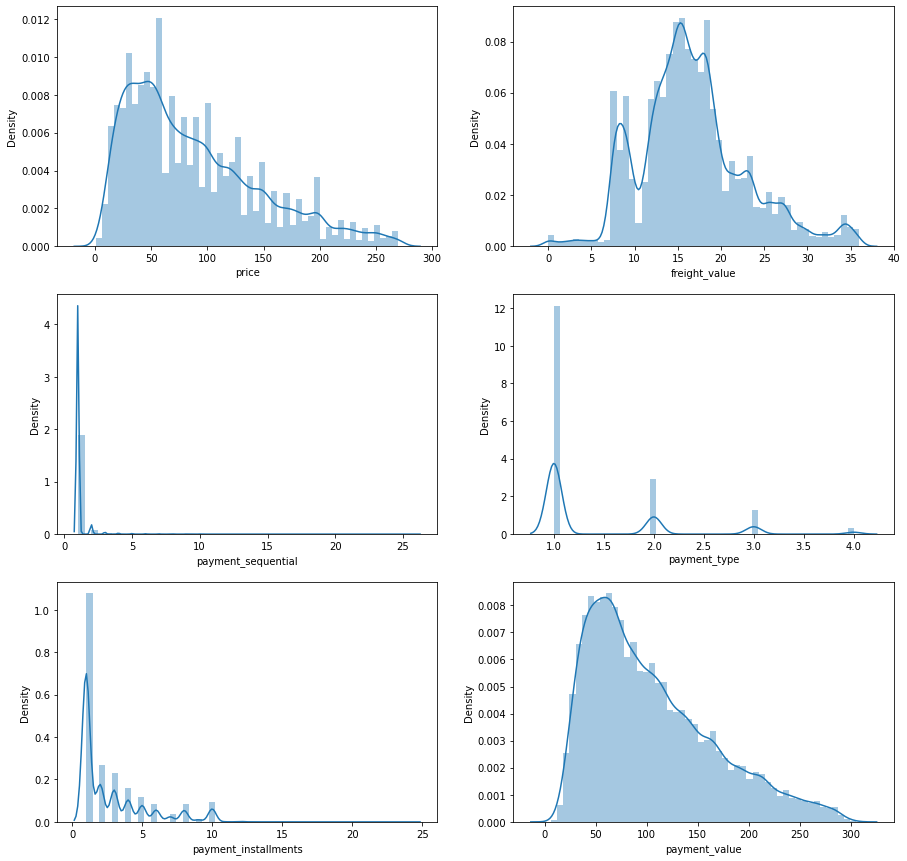

In [24]:
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
sns.distplot(df["price"])
plt.subplot(3,2,2)
sns.distplot(df["freight_value"])
plt.subplot(3,2,3)
sns.distplot(df["payment_sequential"])
plt.subplot(3,2,4)
sns.distplot(df["payment_type"])
plt.subplot(3,2,5)
sns.distplot(df["payment_installments"])
plt.subplot(3,2,6)
sns.distplot(df["payment_value"])

- From price plot, we can infer that it is positively skewed and most people have bought the shoes valued around 50.And it is evident that there are only few customers who are buying high priced shoes.
  
  
- Freight value: It is positively skewed and it also has a considerably large peak at the range of  to 10.Most people were charged a around 10 to 20 for delivery.
  
  
- Payment sequential: Most customers pay in 1 or 2 sequence. the dataset contain very few people who take more than 5 sequences for the payment.


- Payment type: It has only 4 categories and most people have prefered to use type 1 service.


- Payment installments: Most customers have paid the amount in 1 installments. and very few customers have taken more than 10 installments.


- Payment value: It is positvely skewed and maximum people have spent around 40 to 0 in an avg for buying shoes.

<AxesSubplot:xlabel='payment_type', ylabel='count'>

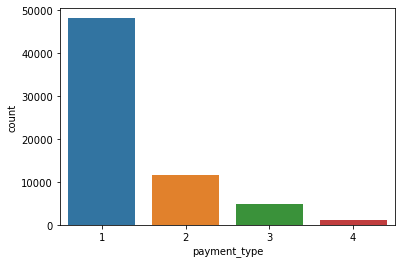

In [25]:
# Countplot for payment type
sns.countplot(df["payment_type"])

<AxesSubplot:xlabel='payment_installments', ylabel='count'>

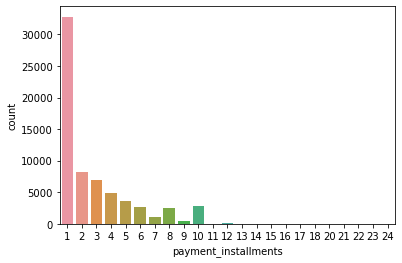

In [26]:
# Countplot for payment installments
sns.countplot(df["payment_installments"])

<AxesSubplot:xlabel='payment_sequential', ylabel='count'>

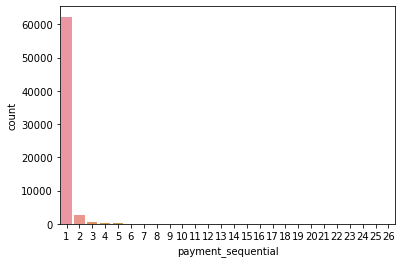

In [27]:
# Countplot for payment sequential
sns.countplot(df["payment_sequential"])

#### Outlier Treatment

<AxesSubplot:>

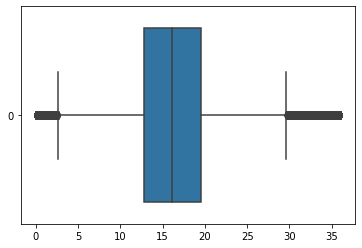

In [28]:
# Outlier Treatment for freight_value
sns.boxplot(data = X["freight_value"], orient = "h")

In [29]:
#Replacing freight value > 30 with 30 and freight value < 3 with 3
X["freight_value"] = np.where(X["freight_value"]>=30, X["freight_value"] == 30, X["freight_value"])
X["freight_value"] = np.where(X["freight_value"]<=3, X["freight_value"] == 3, X["freight_value"])

<AxesSubplot:>

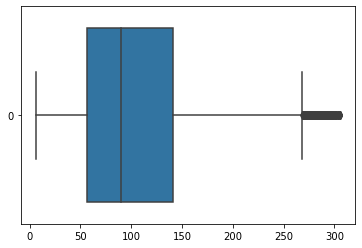

In [30]:
# Outlier Treatment for payment value
sns.boxplot(data = X["payment_value"], orient = "h")

In [31]:
#Replacing payment value > 270 with 270
X["payment_value"] = np.where(X["payment_value"]>=270, X["payment_value"] == 270, X["payment_value"])

<AxesSubplot:>

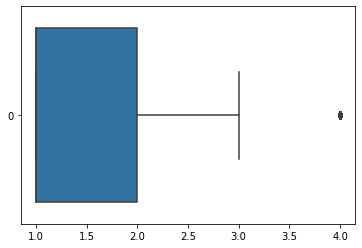

In [32]:
# Outlier Treatment for payment type
sns.boxplot(data = X["payment_type"], orient = "h")

In [33]:
#Replacing payment type > 3 with 3
X["payment_type"] = np.where(X["payment_type"]> 3, X["payment_type"] == 3, X["payment_type"])

<AxesSubplot:>

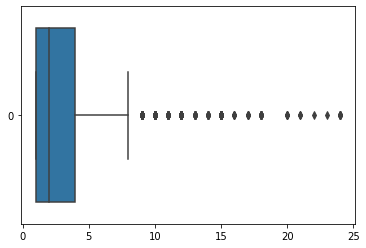

In [34]:
# Outlier Treatment for payment type
sns.boxplot(data = X["payment_installments"], orient = "h")

In [35]:
#Replacing payment installments > 10 with 10
X["payment_installments"] = np.where(X["payment_installments"]> 10, X["payment_installments"] == 10, X["payment_installments"])

<AxesSubplot:>

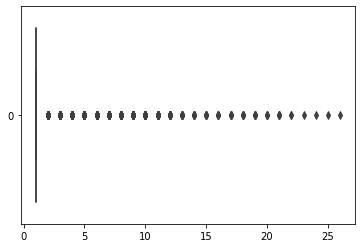

In [36]:
# Outlier Treatment for payment Sequential
sns.boxplot(data = X["payment_sequential"], orient = "h")

In [37]:
#Replacing payment installments > 5 with 5
X["payment_sequential"] = np.where(X["payment_sequential"]> 5, X["payment_sequential"] == 5, X["payment_sequential"])

- I would recommend the zshoes comapany to reduce the sequence of payments and installments of payment as there are only approx 20 customers out of 66000 people who take more time to pay which is just 0.03% of customers. 

In [38]:
# Correlation
X.corr()

,freight_value,payment_sequential,payment_type,payment_installments,payment_value
freight_value,1.000000,-0.001866,-0.006060,0.063940,0.211046
payment_sequential,-0.001866,1.000000,0.458517,-0.124892,-0.034702
payment_type,-0.006060,0.458517,1.000000,-0.343125,-0.079642
payment_installments,0.063940,-0.124892,-0.343125,1.000000,0.236637
payment_value,0.211046,-0.034702,-0.079642,0.236637,1.000000


<AxesSubplot:>

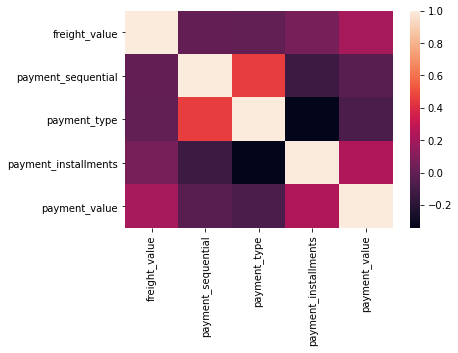

In [39]:
sns.heatmap(data = X.corr())

- we have positve correlation of 0.45 with payment type and payment sequential, and nehative corealtion of - 0.34 with payment type and payment installments.
- Other columns are not much correlated.

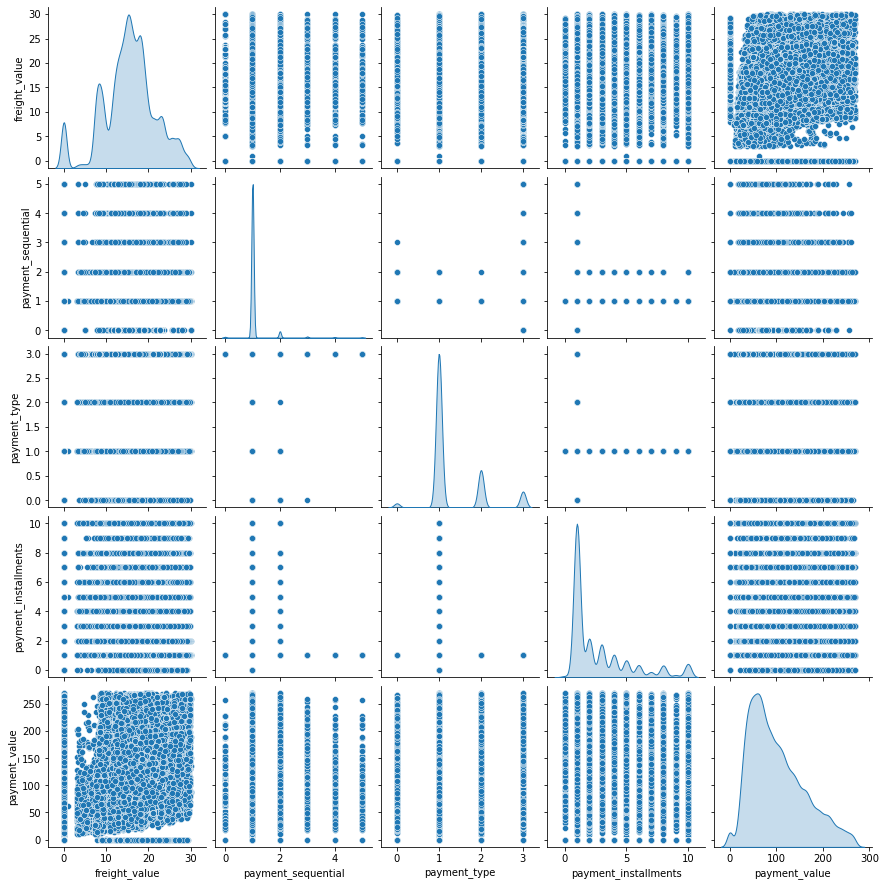

In [40]:
# pairplot for bivariate analysis
sns.pairplot(X, diag_kind="kde")

In [41]:
X.head()

,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,13.29,1,1,2,72.19
1,19.93,1,1,3,259.83
2,17.87,1,1,5,216.87
3,12.79,1,1,2,25.78
4,18.14,1,1,3,218.04


In [42]:
y.head()

0     58.90
1    239.90
2    199.00
3     12.99
4    199.90
Name: price, dtype: float64

In [43]:
X.shape

(66162, 5)

In [44]:
y.shape

(66162,)

####  Divide the dataset into train and test.

In [45]:
#Splitting dataset into Training and Test set
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [46]:
# scaling all the dimensions using z scores
from scipy.stats import zscore

X_train  = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [47]:
X_train.head()

,freight_value,payment_sequential,payment_type,payment_installments,payment_value
7355,0.047476,-0.185614,1.090984,-0.705735,-0.091038
40372,-0.562308,-0.185614,1.090984,-0.705735,1.034147
26803,-2.544516,-0.185614,-0.483990,0.490966,-0.690004
39431,-0.041279,-0.185614,2.665958,-0.705735,-0.950054
31420,-0.041279,-0.185614,1.090984,-0.705735,-1.018042


In [48]:
X_test.head()

,freight_value,payment_sequential,payment_type,payment_installments,payment_value
22944,0.078603,-0.18627,-0.489914,-0.707811,1.500551
10095,1.084449,-0.18627,-0.489914,-0.707811,2.213796
60745,-0.599643,-0.18627,-0.489914,0.880403,-1.188825
72770,0.840807,-0.18627,-0.489914,0.483349,1.495987
80498,-0.229242,-0.18627,-0.489914,-0.310757,-0.848259


In [49]:
y_train.head()

7355      79.99
40372    149.90
26803     59.99
39431     29.99
31420     25.99
Name: price, dtype: float64

In [50]:
y_test.head()

22944    173.90
10095    209.99
60745     18.90
72770    169.00
80498     36.80
Name: price, dtype: float64

#### Train a suitable model and evaluate it using appropriate metrics.

In [51]:
from sklearn import metrics
import pickle

def predict(ml_model,dump):
    model = ml_model.fit(X_train,y_train)
    print("Training Score : {}".format(model.score(X_train,y_train)))
    
    y_prediction = model.predict(X_test)
    print("Predictions are: \n {}".format(y_prediction))
    print("\n")
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print("r2_score: {}".format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        
        file=open('F:\AIML\gl_ds/model.pkl','wb')
        pickle.dump(model,file)

Training Score : 0.7447985388388574
Predictions are: 
 [160.88229005 195.80570244  31.65138568 ...  88.77022111  96.25855937
  51.89326166]


r2_score: 0.7530031652612709
MAE: 10.488998573459625
MSE: 869.9291553674266
RMSE: 29.494561454061774


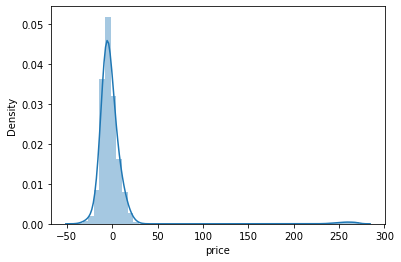

In [52]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression(),0)

Training Score : 0.9930189278456788
Predictions are: 
 [170.948 208.76   17.356 ...  71.796  76.656  45.34 ]


r2_score: 0.9848039985410056
MAE: 1.5878808000403049
MSE: 53.52070494412816
RMSE: 7.315784643093874


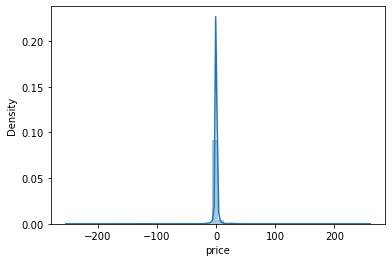

In [53]:
from sklearn.neighbors import KNeighborsRegressor
predict(KNeighborsRegressor(),0)

Training Score : 0.999943610223426
Predictions are: 
 [173.2  208.9   19.5  ...  71.99  75.9   46.2 ]


r2_score: 0.997764011717233
MAE: 0.6388014435147438
MSE: 7.8752077948551396
RMSE: 2.8062800635102585


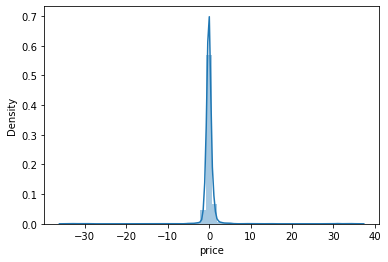

In [54]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),0)

Training Score : 0.9998007342651776
Predictions are: 
 [173.519  209.4948  19.1378 ...  72.2483  75.7656  46.1253]


r2_score: 0.9984951528902581
MAE: 0.568529809742358
MSE: 5.300109924564945
RMSE: 2.302196760610384


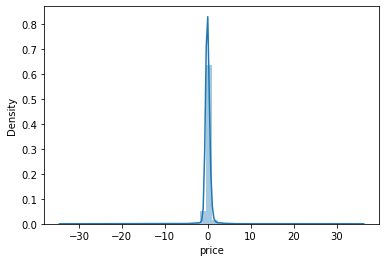

In [55]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),1)

- Though the R2 Score for for KNN, Decision Tree and Random forest is 99. Random forest has low MAE, MSE and RMSE than all other models, so we can say random forest model is better than all.